In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

# List of ideas / double-checks

## Ideas
- hierarchy of schools & then grades for stats
- Run session standard deviations per LC & per grade. Isolate worst offenders to follow up on.
- Compare performance metrics per LC. Not just phonics, but also things like sight words as this will let us see who's (potentially) not doing sight word practice.
- A scatter plot comparing number of sessions with improvement.


## Double-Checks / Fixes
- Children 'On The Programme' w/ an 'LC' but zero sessions
- The 'On The Programme' flag for children that left in the middle of the year (this throws off stats like Sessions STD)
- Set improvements to zero if we didn't do end of year assessments (eg Sandwater)

In [337]:
uni = pd.read_csv("20230401 - Masi University Main Sheet.csv")
tl = pd.read_csv("2023 Top Learner  High School - Main -20230120 - NMB High Schools.csv")
children = pd.read_csv("2022 - Children's Results.csv")

In [338]:
children.columns

Index(['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jan - Pencil handling',
       'Jan - Picture', 'Jan - Name', 'Jan - Sounds First Letter',
       'Jan - Phonics', 'Jan - Blending', 'Jan - Sight Words',
       'Jan - CVCs Written', 'Jan - Written Words', 'Jan - Sounds Full Word',
       'Jan - Letters Correct', 'Jan - Sentence 1', 'Jan - Sentence 2',
       'Jan - Writing a Story', 'Jan - Total', 'Jan - Total Score %',
       'Jun - Pencil handling', 'Jun - Picture', 'Jun - Name',
       'Jun - Sounds First Letter', 'Jun - Phonics', 'Jun - Blending',
       'Jun - Sight Words', 'Jun - CVCs Written', 'Jun - Written Words',
       'Jun - Sounds Full Word', 'Jun -  Letters Correct (8/29pts)',
       'Jun - Sentence 1', 'Jun - Sentence 2', 'Jun - Writing a Story',
       'Jun - T

## Calculating Improvement Columns

In [339]:
children["Jan - Setence Total"] = children["Jan - Sentence 1"] + children["Jan - Sentence 2"]
children["Nov - Sentence Total"] = children["Nov - Sentence 1"] + children["Nov - Sentence 2"]
children["First Sounds Improvement"] = children["Nov - Sounds First Letter"] - children["Jan - Sounds First Letter"]
children["Phonics Improvement"] = children["Nov - Phonics"] - children["Jan - Phonics"]
children["Sight Words Improvement"] = children["Nov - Sight Words"] - children["Jan - Sight Words"]
children["Letters Improvement"] = children["Nov - Letters Correct"] - children["Jan - Letters Correct"]
children["Sentence Improvement"] = children["Nov - Sentence Total"] - children["Jan - Setence Total"]
children["Total Improvement"] = children["Nov - Total"] - children["Jan - Total"]

## Creating our Group By Objects (GBOs)
- N.B. I'm using the Grade column to distinguish ECD children vs Primary b/c of the schools that have 'Both'. Might be susceptible to errors, so confirm data is correct.
- Four objects created
    1. Primary School - On Programme
    2. Primary School - Not On Programme
    3. ECD - On Programme
    4. ECD - Not On Programme

In [344]:
on_programme_primary = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] != "PreR")]
on_primary = on_programme_primary.groupby("Schools")
not_programme_primary = children[(children['On The Programme EOY'] == "No") & (children['Centre Type'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
not_primary = on_programme_primary.groupby("Schools")
on_programme_ecd = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "PreR")]
on_ecd = on_programme_ecd.groupby("Schools")
not_programme_ecd = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "PreR") & (children['Ever On Programme'] != "Graduated")]
not_ecd = on_programme_ecd.groupby("Schools")
on_programme_R = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade R")]
on_R = on_programme_R.groupby("Schools")
not_programme_R = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade R") & (children['Ever On Programme'] != "Graduated")]
not_R = not_programme_R.groupby("Schools")
on_programme_1 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 1")]
on_1 = on_programme_1.groupby("Schools")
not_programme_1 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 1") & (children['Ever On Programme'] != "Graduated")]
not_1 = not_programme_1.groupby("Schools")
on_programme_2 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 2")]
on_2 = on_programme_2.groupby("Schools")
not_programme_2 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 2") & (children['Ever On Programme'] != "Graduated")]
not_2 = not_programme_2.groupby("Schools")
on_programme_3 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 3")]
on_3 = on_programme_3.groupby("Schools")
not_programme_3 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 3") & (children['Ever On Programme'] != "Graduated")]
not_3 = not_programme_3.groupby("Schools")
all_ECD = children[children['Grade'] == "PreR"]
all_Primary = children[(children['Grade'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
all_R = children[children['Grade'] == "Grade R"]
all_1 = children[children['Grade'] == "Grade 1"]
all_2 = children[children['Grade'] == "Grade 2"]
all_2 = children[children['Grade'] == "Grade 3"]

### Grade R Phonics: Base Case

This is gives a sense of the starting point of children at the different schools. Note the Y-axis, in reality there's very little difference between the children

<AxesSubplot:title={'center':'Grade 1: Base Case Phonics'}, xlabel='Schools'>

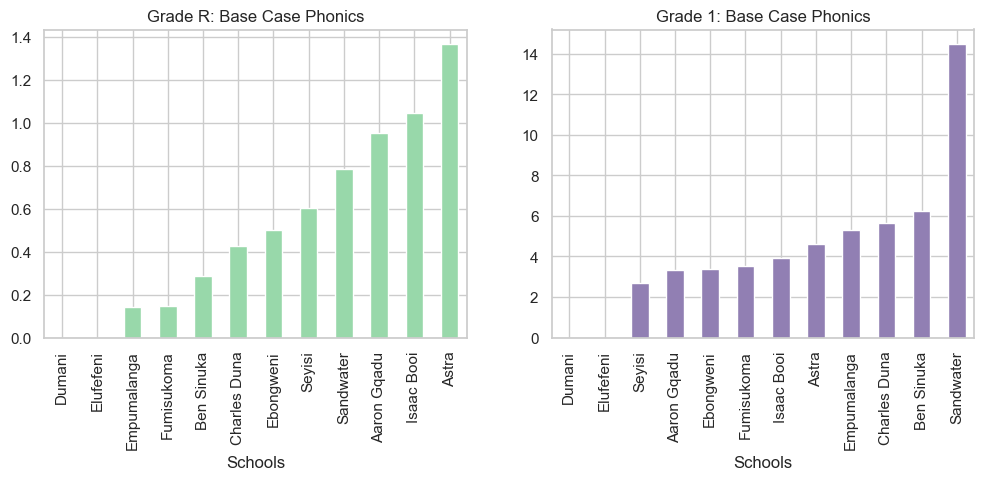

In [295]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Grade R: Base Case Phonics")
GradeR = children[children['Grade'] == "Grade R"]
GR = GradeR.groupby("Schools")
GR['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(1,2,2)
plt.title("Grade 1: Base Case Phonics")
Grade1 = children[children['Grade'] == "Grade 1"]
G1 = Grade1.groupby("Schools")
G1['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = G1_colour)

## Standard Deviation Checks
#### Comparing Standard Deviations per Site

Higher standard deviations should be investigated as it's an indicator that the LCs are not taking their children correctly. Note that much higher SDs are to be expected in ECDCs b/c of attendance and parents paying fees.

### Primary School Standard Deviation

Text(0.5, 0, '<-----  Good                  Bad  ----->')

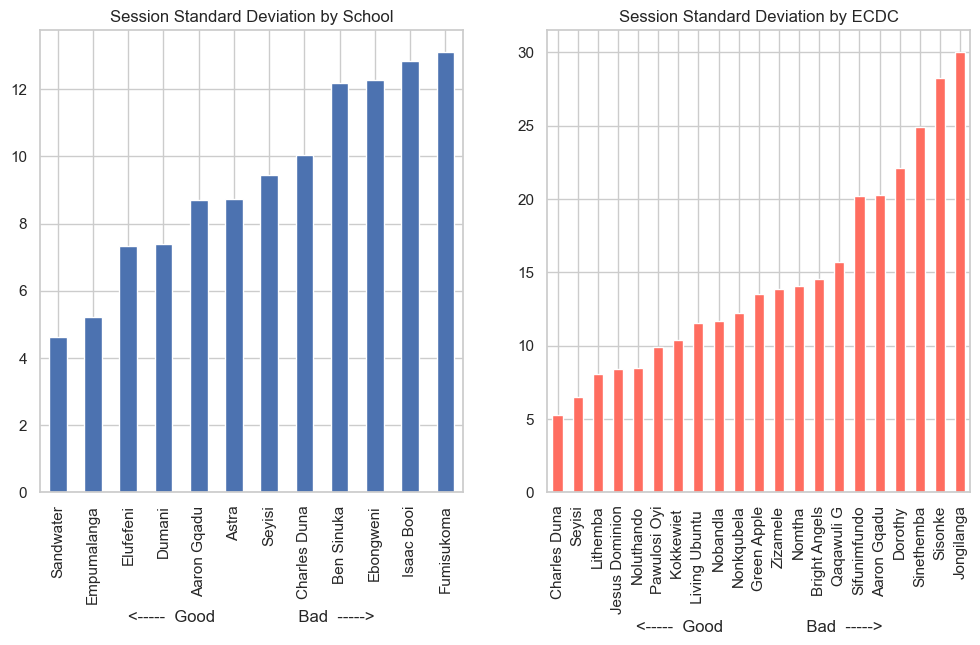

In [296]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
on_primary['Total Sessions'].std().sort_values().plot(kind="bar")
plt.title("Session Standard Deviation by School")
plt.xlabel("<-----  Good                  Bad  ----->")
plt.subplot(1,2,2)
on_ecd['Total Sessions'].std().sort_values().plot(kind="bar", color=ECD_colour)
plt.title("Session Standard Deviation by ECDC")
plt.xlabel("<-----  Good                  Bad  ----->")

## Total Sessions Comparisons

### Primary School Sessions

<AxesSubplot:xlabel='Schools'>

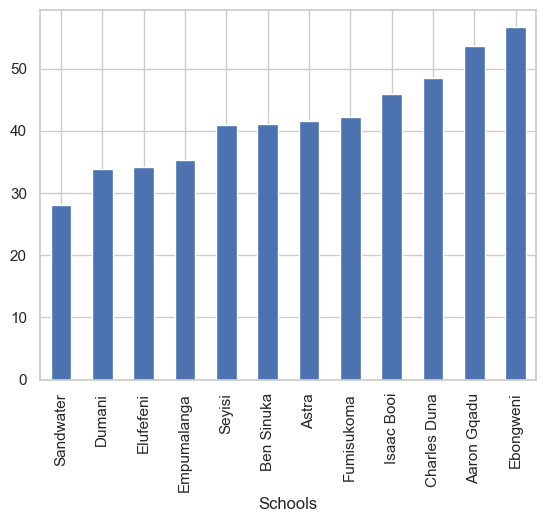

In [297]:
on_primary['Total Sessions'].mean().sort_values().plot(kind="bar", color="b")

### ECDC Sesssions

<AxesSubplot:xlabel='Schools'>

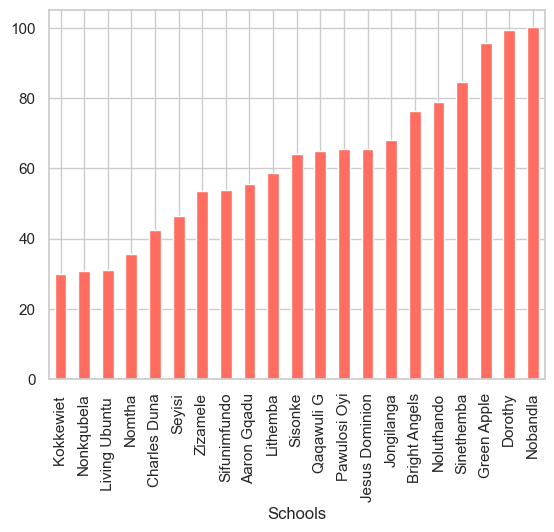

In [298]:
on_ecd['Total Sessions'].mean().sort_values().plot(kind="bar", color=ECD_colour)

# Comparing Results

## Primary Schools (All Learners - End of Year)

<AxesSubplot:title={'center':'All Grade 3s: Total Score'}, xlabel='Schools'>

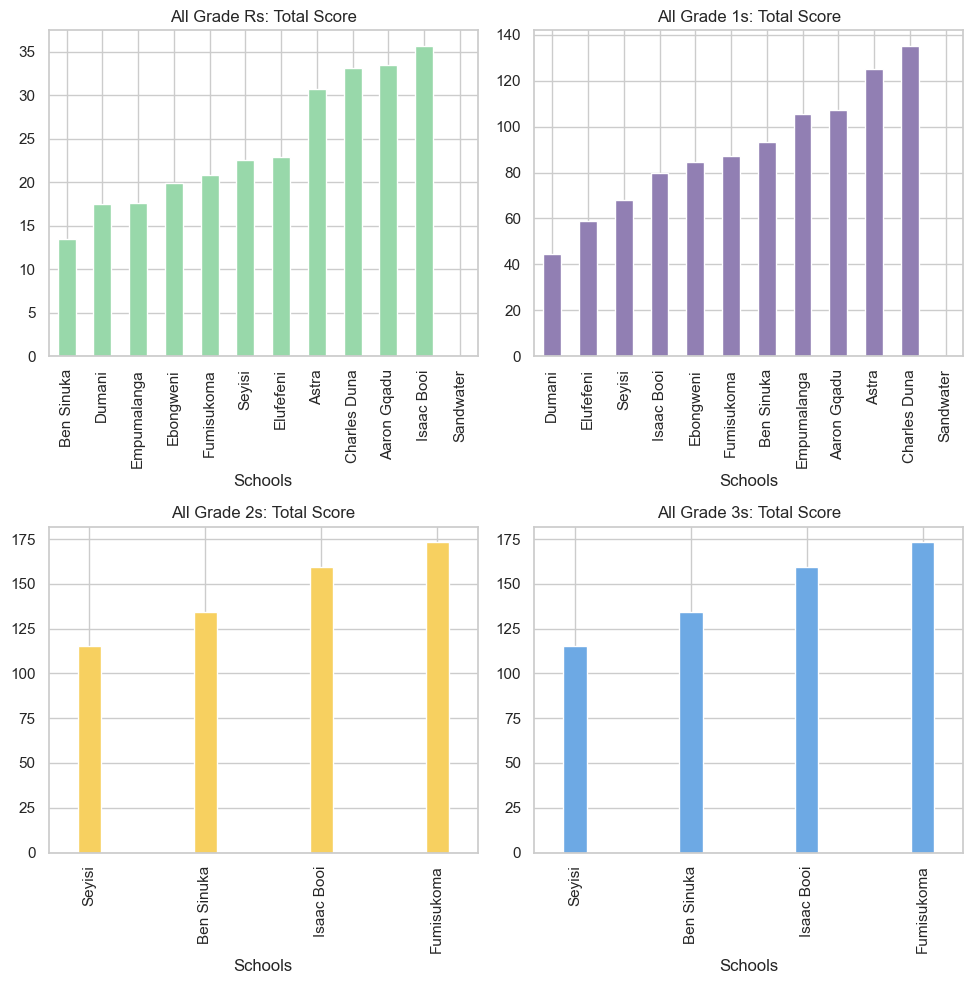

In [299]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.title("All Grade Rs: Total Score")
all_R.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(2,2,2)
plt.title("All Grade 1s: Total Score")
all_1.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = G1_colour)
plt.subplot(2,2,3)
plt.tight_layout()
plt.title("All Grade 2s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G2_colour)
plt.subplot(2,2,4)
plt.tight_layout()
plt.title("All Grade 3s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G3_colour)

## ECD & Grade R: Final Score & Improvement

- The first row shows the final scores. This allows us to compare schools / ECD Centres (at least in terms of what the assessment captures).
- The second row shows total improvement in scores. This allows us to view the 

Text(0.5, 1.0, 'Grade R Improvement')

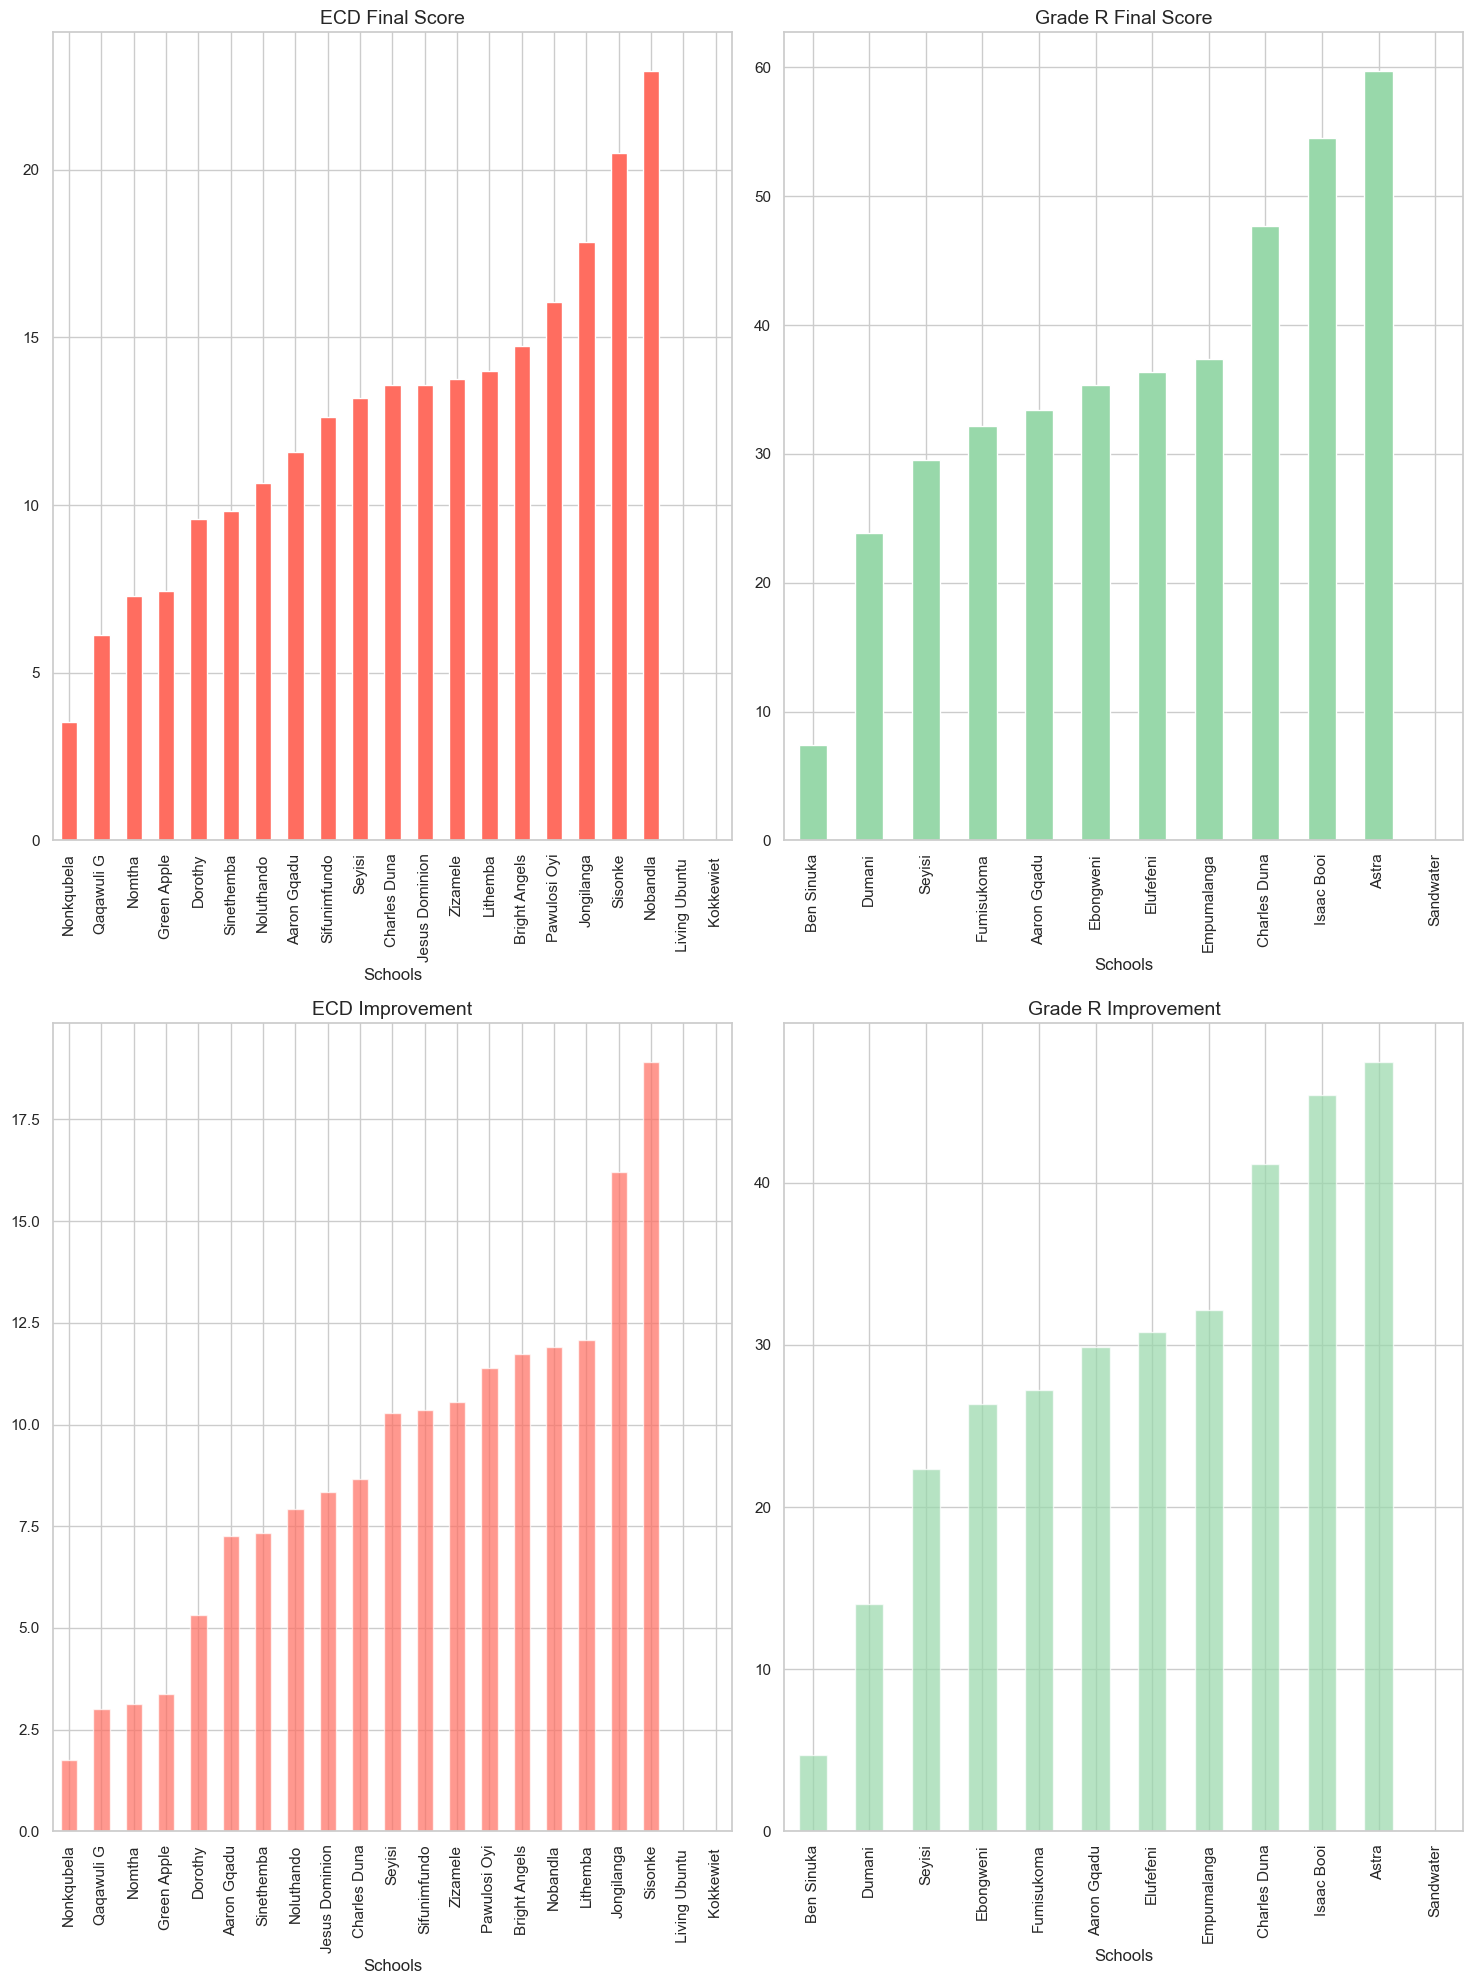

In [300]:
plt.figure(figsize=(15,20))
plt.tight_layout()
plt.subplot(2,2,1)
plt.title("ECD Final Score", fontsize = 14)
on_ecd['Nov - Total'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2)
on_R['Nov - Total'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Final Score", fontsize = 14)
plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Improvement", fontsize = 14)
on_ecd['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4)
plt.tight_layout()
on_R['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Improvement", fontsize = 14)

## ECD & Grade R: Phonics Score & Improvement

Text(0.5, 1.0, 'Grade R Phonics Improvement')

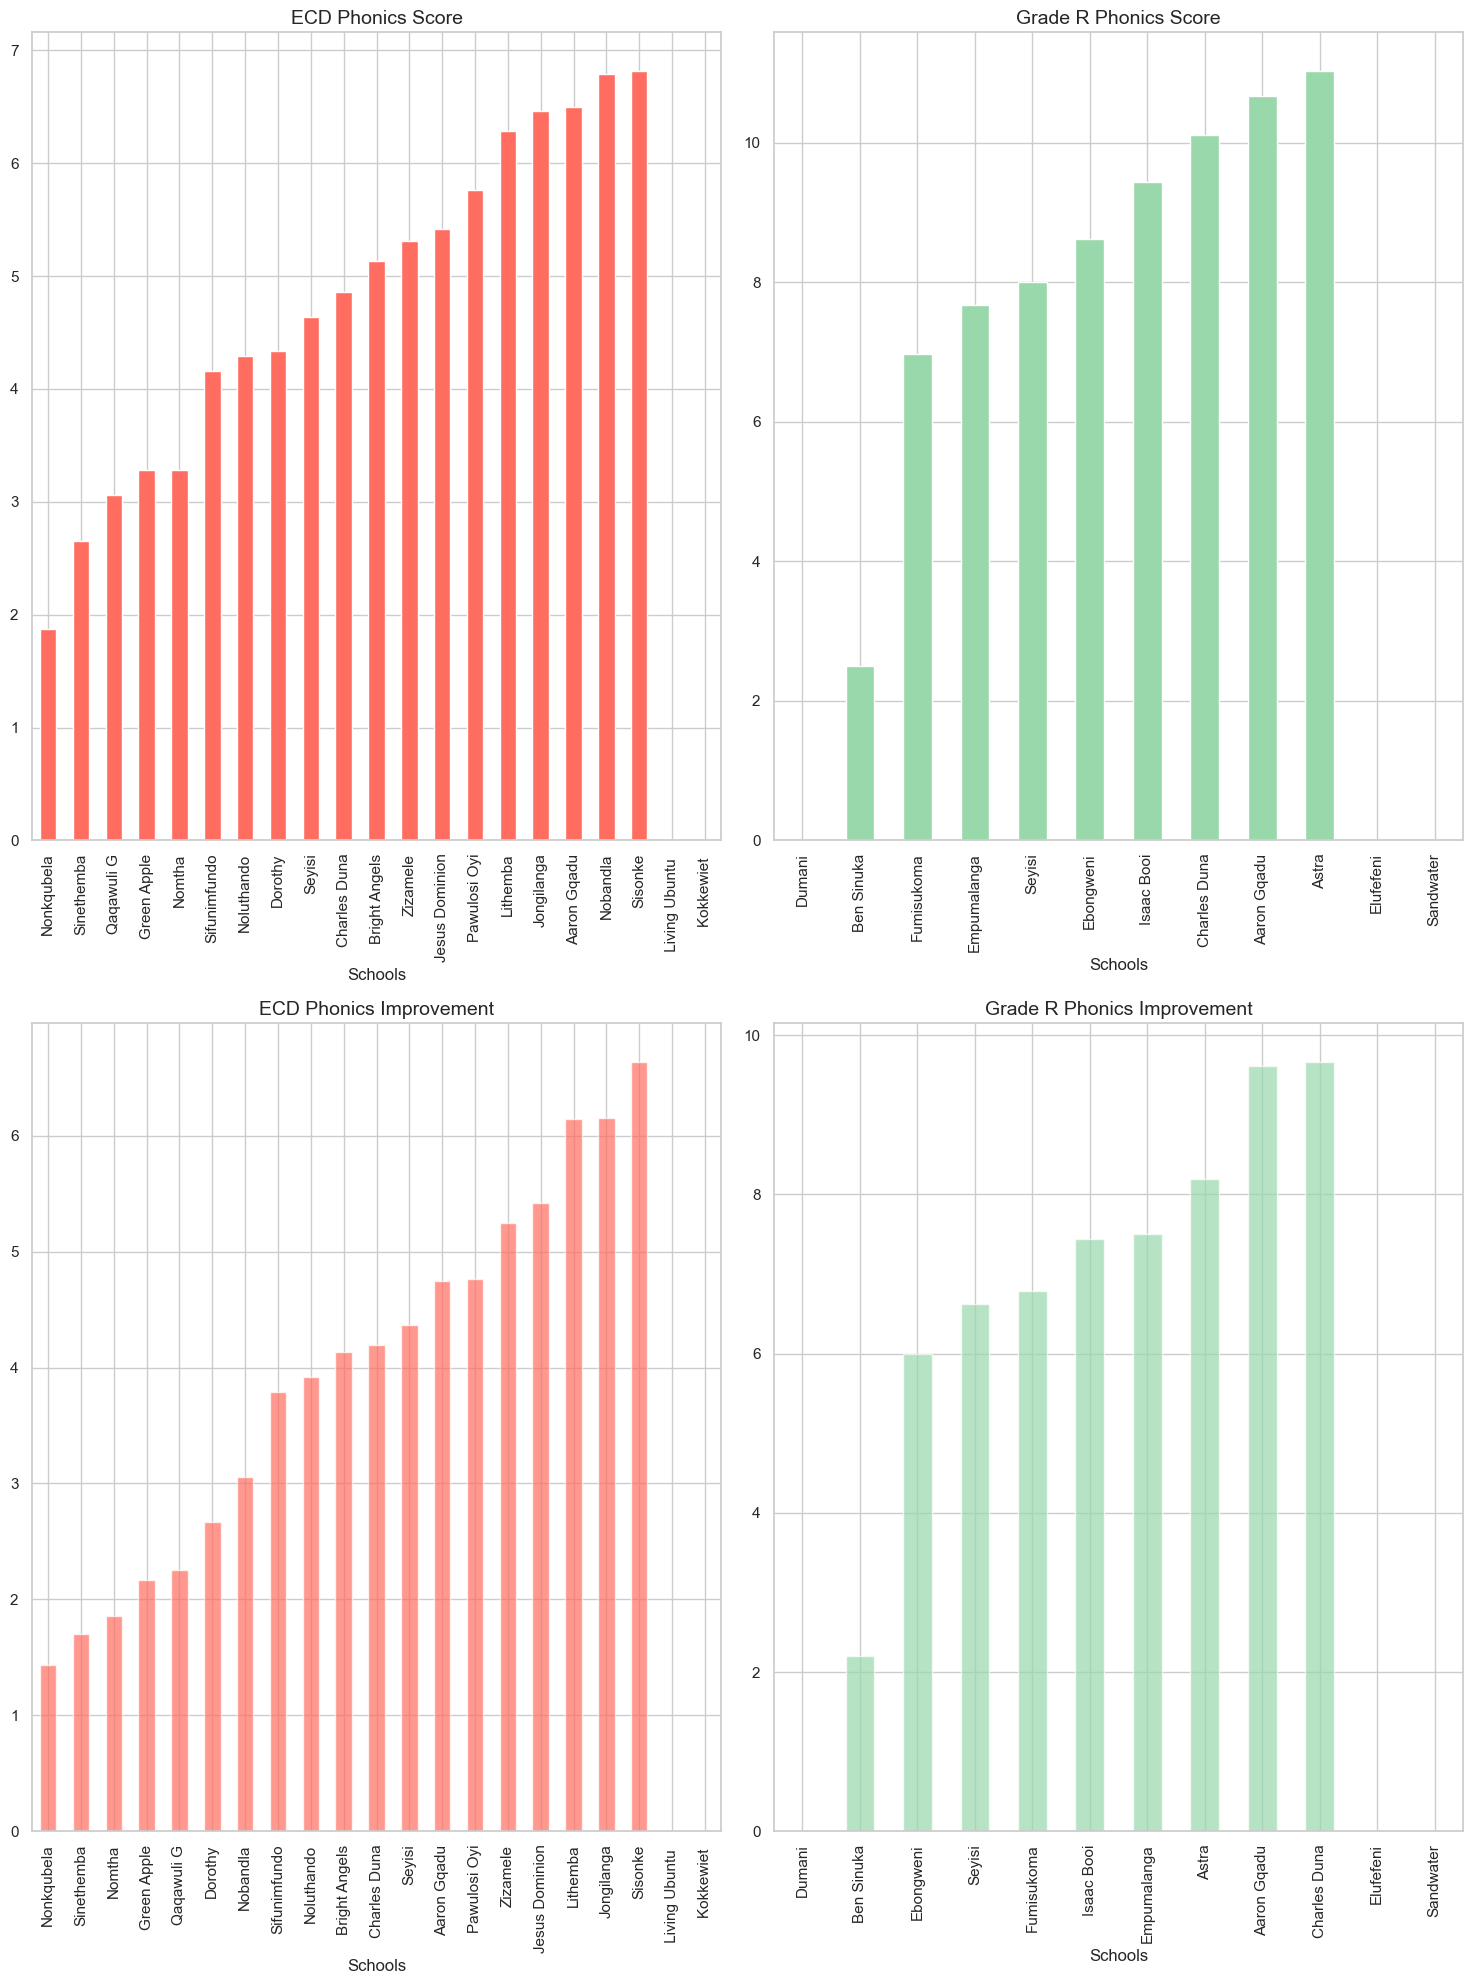

In [301]:
plt.figure(figsize=(15,20))
plt.tight_layout()
plt.subplot(2,2,1)
plt.title("ECD Phonics Score", fontsize = 14)
on_ecd['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2)
on_R['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Phonics Score", fontsize = 14)
plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Phonics Improvement", fontsize = 14)
on_ecd['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4)
plt.tight_layout()
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Phonics Improvement", fontsize = 14)

Text(0.5, 1.0, 'Grade 2 Improvement')

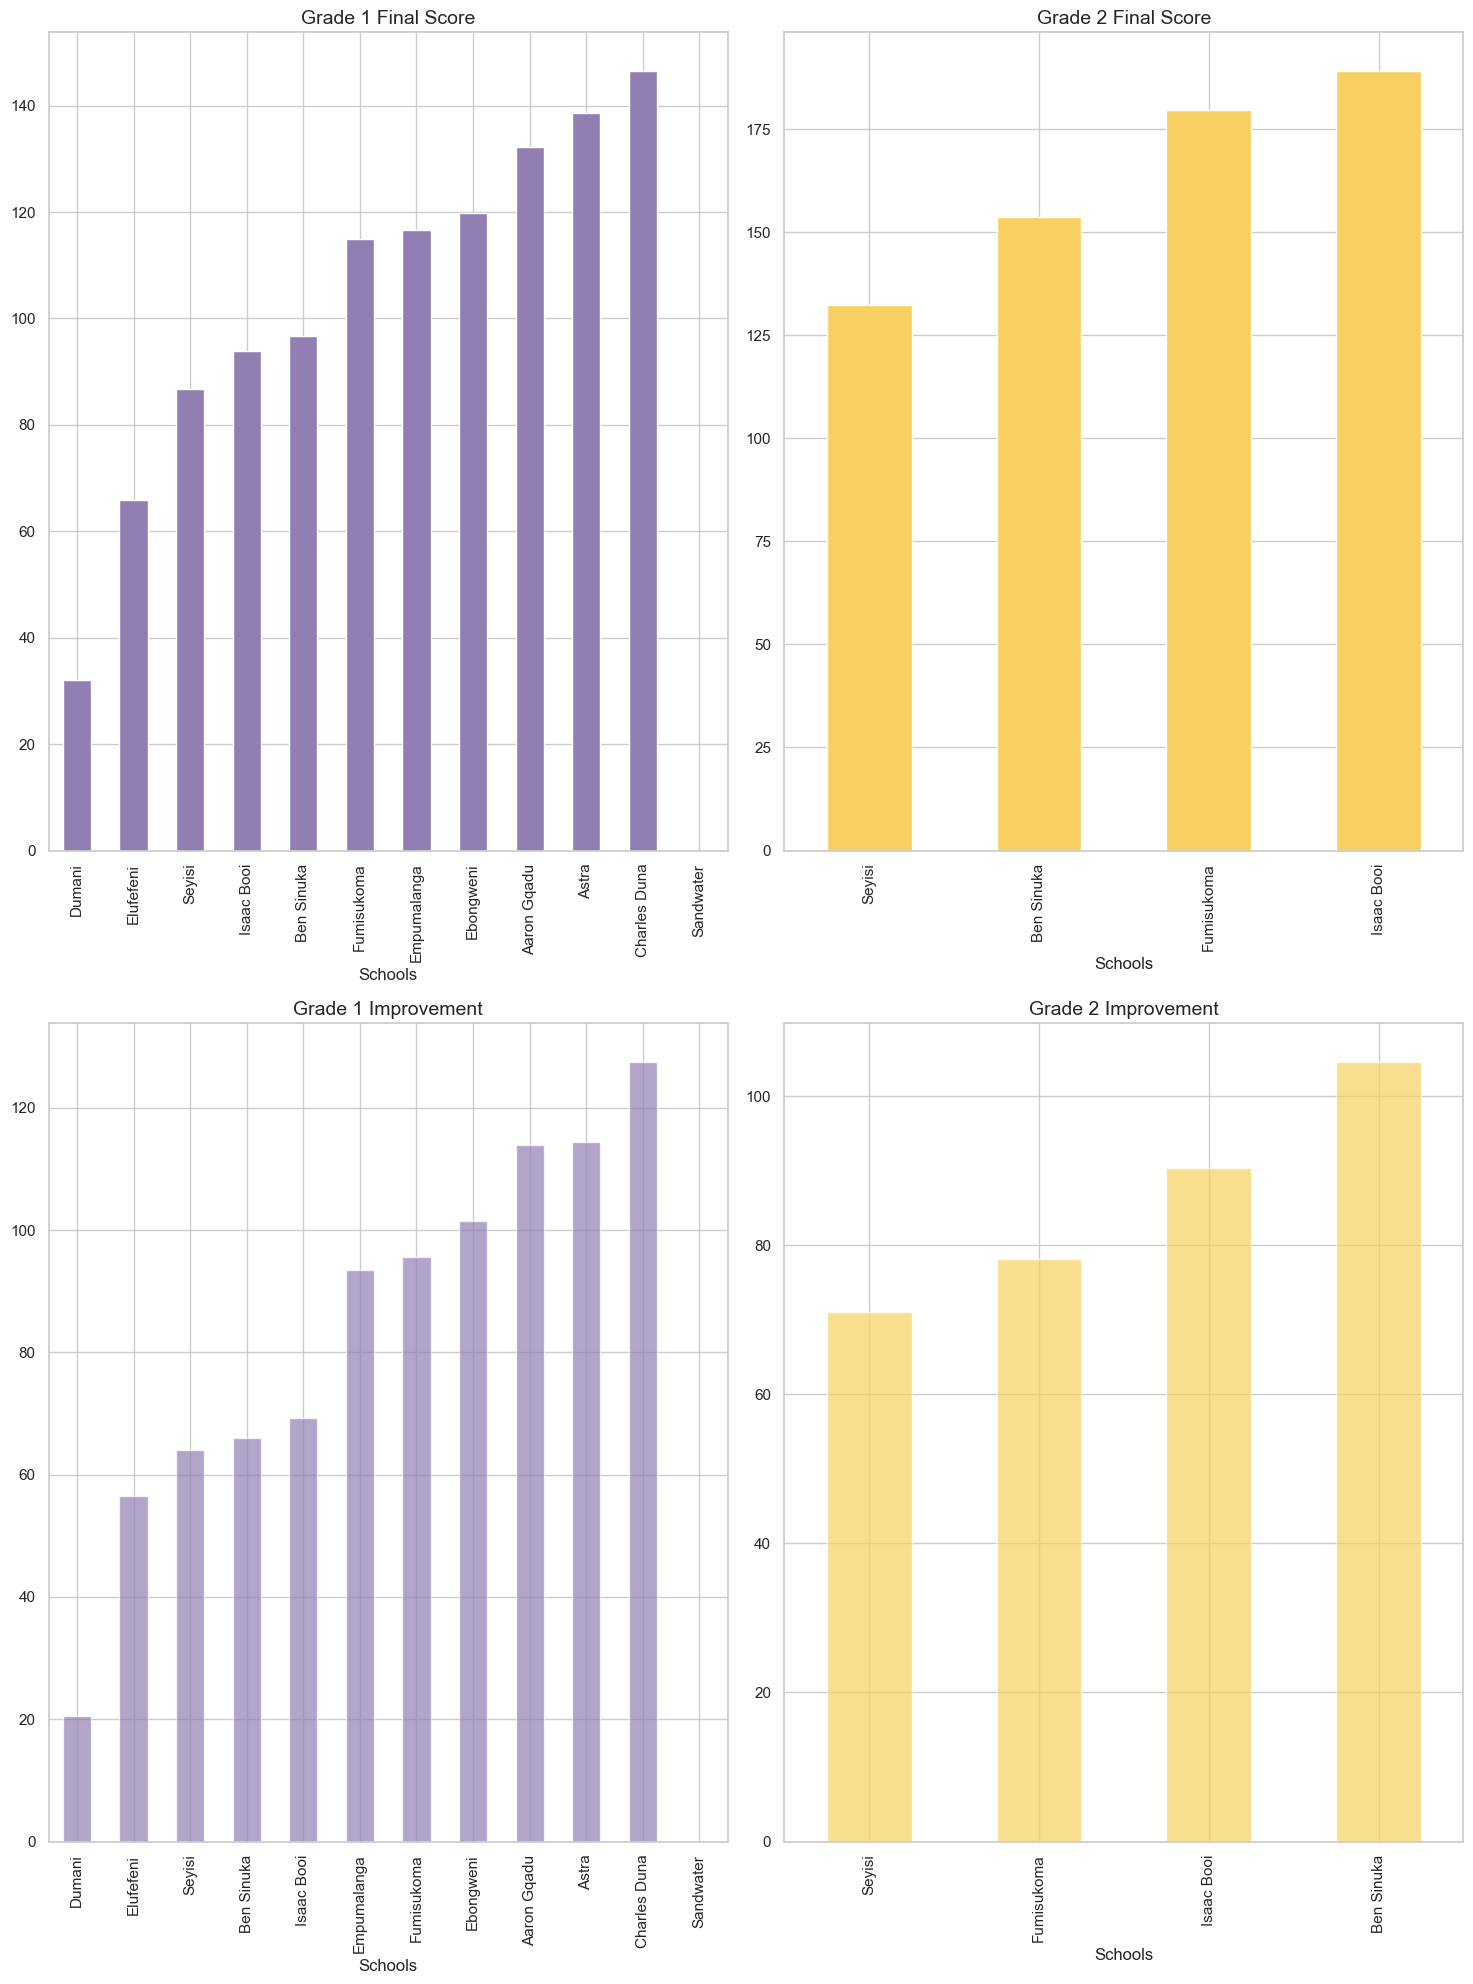

In [302]:
plt.figure(figsize=(15,20))
plt.tight_layout()
plt.subplot(2,2,1)
plt.title("Grade 1 Final Score", fontsize = 14)
on_1['Nov - Total'].mean().sort_values().plot(kind="bar", color=G1_colour)
plt.subplot(2,2,2)
plt.title("Grade 2 Final Score", fontsize = 14)
on_2['Nov - Total'].mean().sort_values().plot(kind="bar", color=G2_colour)
plt.subplot(2,2,3)
plt.tight_layout()
plt.title("Grade 1 Improvement", fontsize = 14)
on_1['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=G1_colour)
plt.subplot(2,2,4)
plt.tight_layout()
on_2['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=G2_colour)
plt.title("Grade 2 Improvement", fontsize = 14)

## Grade R & 1 Phonics Improvement

<AxesSubplot:title={'center':'Grade 1 Phonics Improvement'}, xlabel='Schools'>

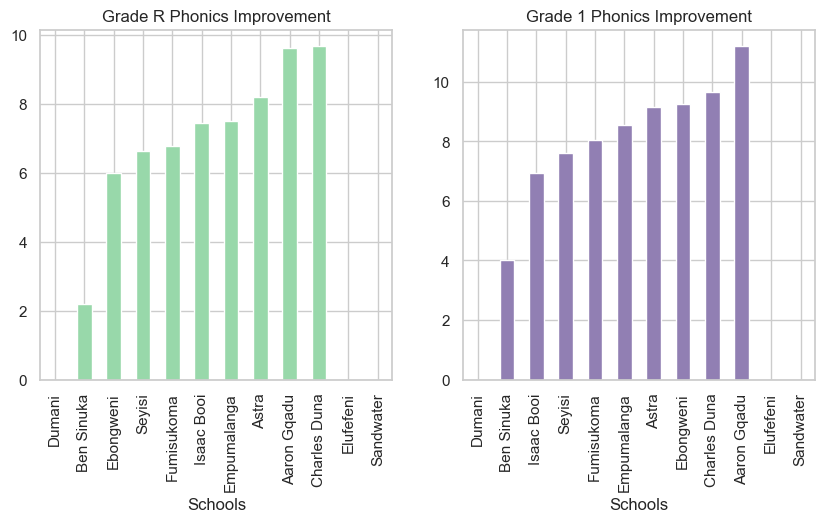

In [303]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Grade R Phonics Improvement")
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.subplot(2,2,2)
plt.title("Grade 1 Phonics Improvement")
on_1['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=G1_colour)

## Grade 1 Phonics

<AxesSubplot:xlabel='Schools'>

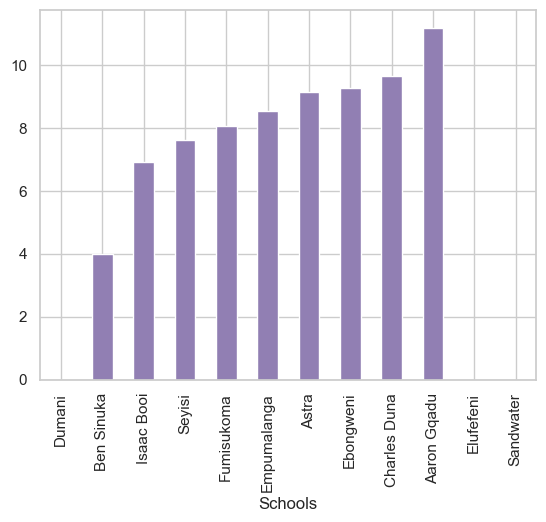

In [304]:
on_1['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=G1_colour)

# Underperforming Children
#### The list below is grabbing children with progress < 10 that are in primary school

In [305]:
underperforming_primary = children[(children['Total Improvement'] < 10) & (children['Total Sessions'] > 10) & (children['Nov - Total'] > 0) & (children['Grade'] != "PreR")]
underperforming_list = underperforming_primary[["Schools", "Class", "LC Name", "Surname & Name","Total Sessions", "Nov - Total", "Total Improvement"]]
pd.set_option('display.max_rows', 100)
underperforming_list.sort_values("LC Name")

,Schools,Class,LC Name,Surname & Name,Total Sessions,Nov - Total,Total Improvement
3153,Fumisukoma,RA,Akhona Notoko,Yedwa Iminathi,55.0,5.0,3.0
3047,Fumisukoma,RA,Anesipho Ndarala,Fisanti Siyabonga,45.0,9.0,5.0
3089,Fumisukoma,RC,Anesipho Ndarala,Mazungula Iviwe,49.0,2.0,-3.0
632,Elufefeni,1C,Asanda Ntozini,Bukatya Lunje,34.0,6.0,4.0
2694,Dumani,RD,Asiphe,Mali Asive,22.0,5.0,3.0
2767,Dumani,RB,Asiphe,Nyunyu Likhona,21.0,2.0,-8.0
2748,Dumani,RB,Asiphe,Ndlebe Lulonke,19.0,4.0,-9.0
2461,Astra,RA,Ayabonga Mabuza,Vries Emile,51.0,20.0,0.0
1910,Fumisukoma,3A,Blessing,Hlohla Mihlali,52.0,98.0,5.0
3365,Seyisi,RA,Chuma Bingwa,Sityebi Oyama,28.0,3.0,-3.0


### LCs with multiple children that are underperforming.

In [306]:
underperforming_list['LC Name'].value_counts().head(20)

Luphumzo Bassie         5
Zozo Kota               4
Vuyokazi Mali           4
Phelisa Mangesi         3
Ntombizandile           3
Asiphe                  3
Left                    3
Mbasa                   2
Zanele                  2
Sino Mozamana           2
Khanya Keli             2
Siphosethu Ntungo       2
Ntomboxolo Makhupula    2
Anesipho Ndarala        2
Sisipho Ntisa           2
Siphosethu Booi         2
Thabo Menze             2
Likhona Simba           2
Luthando Heshu          2
Chuma Bingwa            2
Name: LC Name, dtype: int64

### Schools with the most underperforming children

In [307]:
underperforming_list['Schools'].value_counts().sort_values(ascending=False)

Fumisukoma      19
Dumani          14
Seyisi          13
Ben Sinuka      12
Elufefeni        5
Aaron Gqadu      4
Astra            3
Ebongweni        3
Isaac Booi       3
Charles Duna     3
Empumalanga      2
Name: Schools, dtype: int64

# Programme Impact

### 2022 Improvement Results

<AxesSubplot:title={'center':'Primary School Results'}, xlabel='On The Programme EOY'>

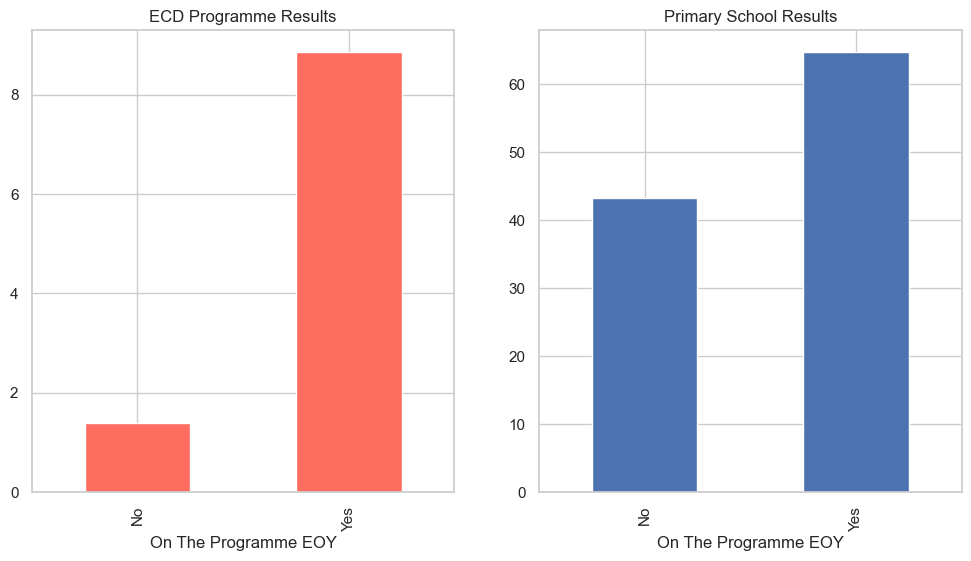

In [346]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Programme Results")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
plt.title("Primary School Results")
plt.xlabel("Children On The Programme")
all_Primary.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar")

### 2022 Total Scores

Text(0.5, 1.0, 'Primary School Scores for Children on Programme')

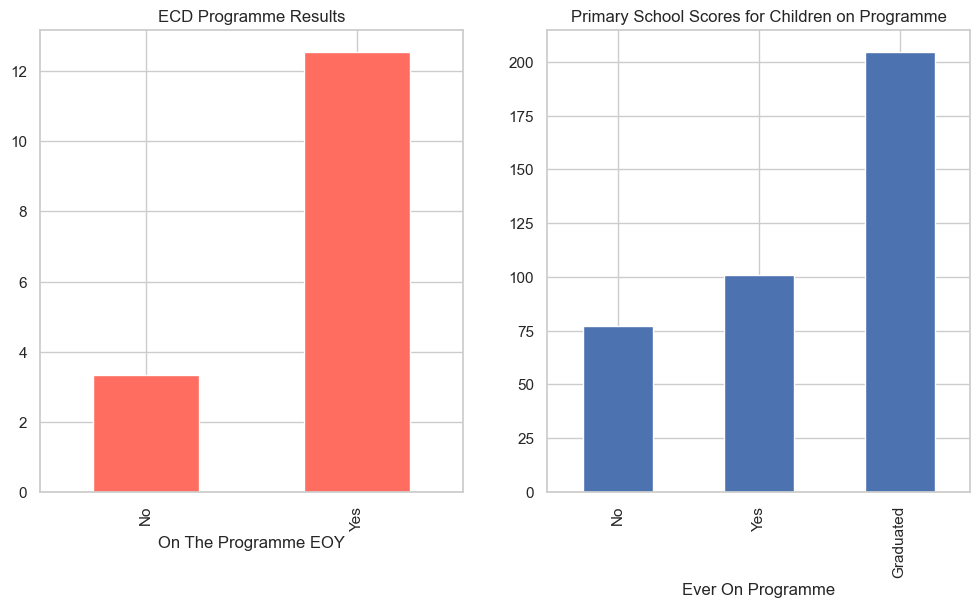

In [354]:
# The following recaptures all primary, but includes previous grads
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Programme Results")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Nov - Total"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
All_Primary_Agg = children[children['Grade'] != "PreR"]
All_Primary_Agg.groupby("Ever On Programme")["Nov - Total"].mean().sort_values().plot(kind="bar")
plt.title("Primary School Scores for Children on Programme")

<AxesSubplot:title={'center':'ECD Improvement'}, xlabel='Schools'>

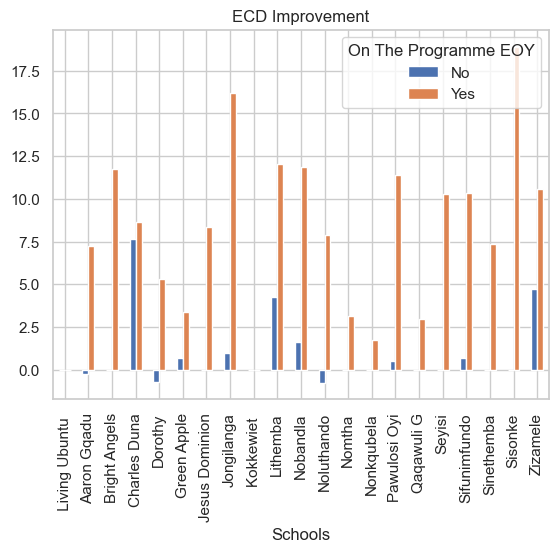

In [365]:
all_ECD.groupby(["Schools", "On The Programme EOY"])["Total Improvement"].mean().unstack().plot(kind="bar", title="ECD Improvement")

<AxesSubplot:title={'center':'Grade R By School'}, xlabel='Schools'>

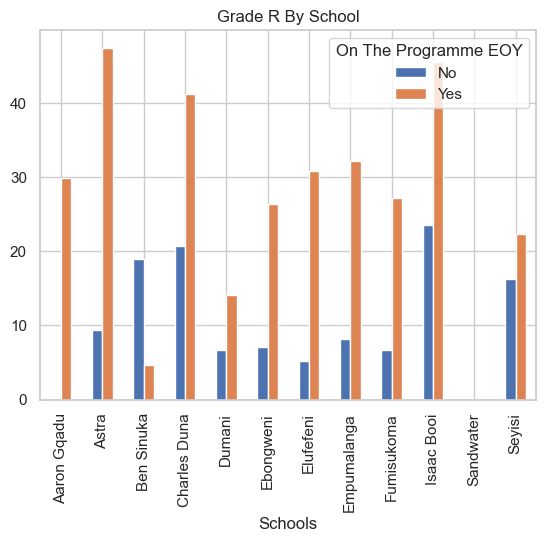

In [364]:
all_R.groupby(["Schools", "On The Programme EOY"])["Total Improvement"].mean().unstack().plot(kind="bar", title="Grade R By School")

<AxesSubplot:title={'center':'Grade 1 By School'}, xlabel='Schools'>

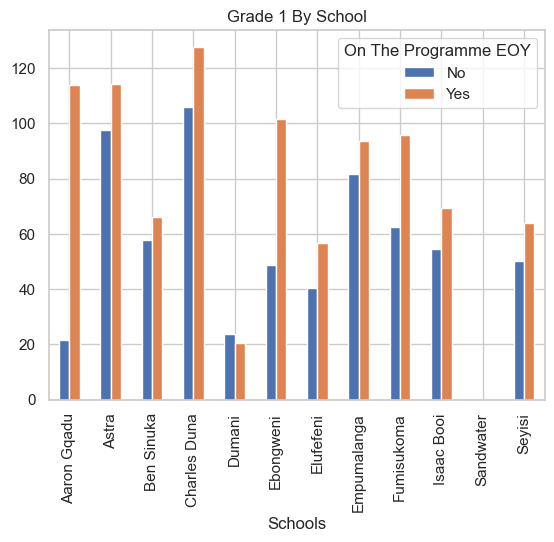

In [363]:
all_1.groupby(["Schools", "On The Programme EOY"])["Total Improvement"].mean().unstack().plot(kind="bar", title="Grade 1 By School")

<AxesSubplot:xlabel='Schools'>

<Figure size 5000x5000 with 0 Axes>

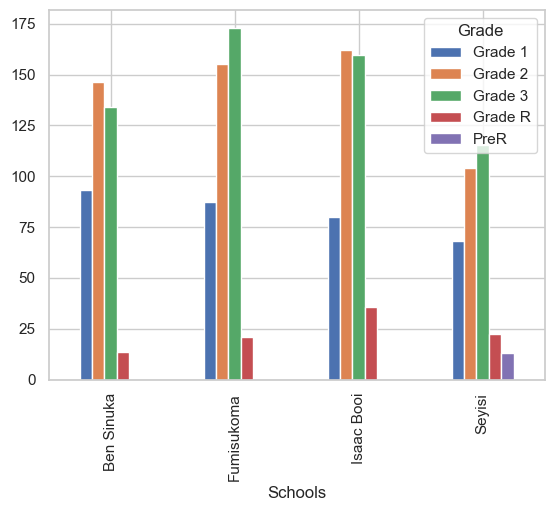

In [326]:
plt.figure(figsize=(50,50))
all_four = ["Ben Sinuka", "Seyisi", "Fumisukoma", "Isaac Booi"]
df_all_four = children[children['Schools'].isin(all_four)]
df_all_four.groupby(["Schools", "Grade"])["Nov - Total"].mean().unstack().plot(kind="bar")

# GPT Prompts

In [310]:
avg_scores = children.groupby('Schools')[['Jan - Phonics', 'Nov - Phonics']].mean().reset_index()
sns.set_theme()
sns.set(style="whitegrid")

In [311]:
num_schools = len(avg_scores['Schools'])
num_schools

30

Text(0.5, 0, 'School')

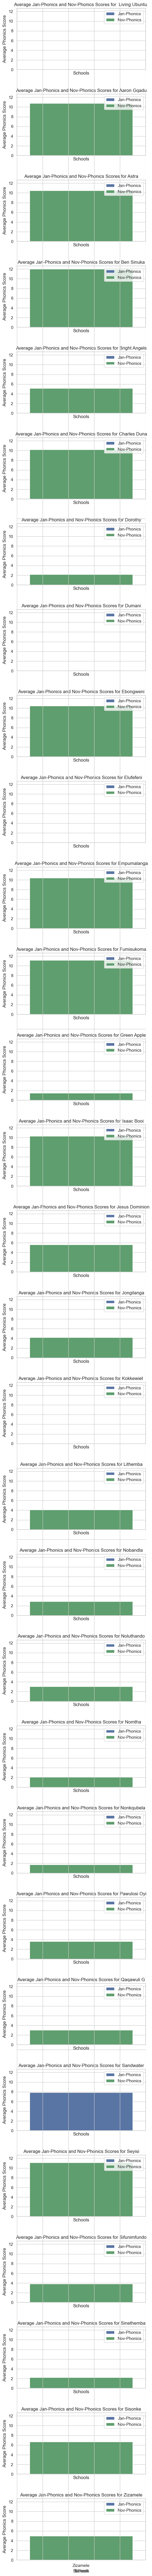

In [312]:
# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]
    
    sns.barplot(data=school_data, x='Schools', y='Jan - Phonics', color='b', label='Jan-Phonics', ax=ax)
    sns.barplot(data=school_data, x='Schools', y='Nov - Phonics', color='g', label='Nov-Phonics', ax=ax)

    # Customize the chart
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("School")

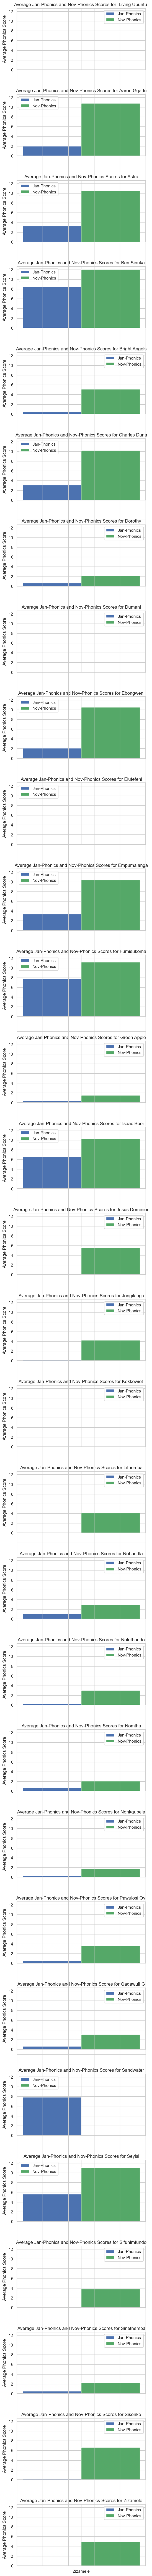

In [313]:
import numpy as np

sns.set(style="whitegrid")

# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Define bar width
bar_width = 0.35

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]

    # Create a bar chart with bars side by side
    jan_scores = school_data['Jan - Phonics']
    nov_scores = school_data['Nov - Phonics']

    index = np.arange(len(school_data))
    
    ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
    ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

    # Customize the chart
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(school_data['Schools'])
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


In [314]:
df = children['Nov -  Letters Correct']
df.plot(kind="hist")

KeyError: 'Nov -  Letters Correct'

In [ ]:
tl.columns

In [ ]:
plt.style.available

In [ ]:
uni["High School"].value_counts().head(10).plot(kind="bar", title="High Schools of Top Learners in Uni")
plt.style.use("fivethirtyeight")

In [ ]:
uni["High School"].value_counts(ascending=False).head(15).plot(kind="barh", color="red")
plt.title("Top High Schools", loc="center",fontsize=18)
plt.xlabel("High Schools", fontsize=14)
plt.ylabel("Num of TLs", fontsize=14)

In [ ]:
grads = uni['First Degree Status']

## This could be super interesting below to plot 4-5 years of APS scores next to each other

In [ ]:
tl['APS Nov'].plot.hist(bins=20, color="purple")

In [ ]:
tl["# of people in the house"].plot(kind="box", showfliers=False)

In [ ]:
uni["First Year\n@ Uni"].value_counts().sort_index().plot.line(color="olive")
plt.title("Number of TLs attending Uni each year", fontsize=16)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Define bar width
bar_width = 0.35

# Create a PDF file to save the charts
with PdfPages("phonics_scores_by_school.pdf") as pdf:
    # Iterate through the schools and create a bar chart for each
    for i, school in enumerate(avg_scores['Schools']):
        # Create the subplots
        fig, ax = plt.subplots(figsize=(6, 4), sharex=True, sharey=True)

        school_data = avg_scores[avg_scores['Schools'] == school]

        # Create a bar chart with bars side by side
        jan_scores = school_data['Jan - Phonics']
        nov_scores = school_data['Nov - Phonics']

        index = np.arange(len(school_data))
        
        ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
        ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

        # Customize the chart
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(school_data['Schools'])
        ax.set_ylabel("Average Phonics Score")
        ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
        ax.legend()

        # Save the chart to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("The PDF file has been created.")


#### Group By Practice
- Creating a group_by object by school
- isolating Seyisi using get_group
- isolating Seyisi Grade 1 using filtering
- getting some basic stats on Seyisi Grade 1 using describe

In [ ]:
sites = children.groupby("Schools")
seyisi = sites.get_group("Seyisi")
seyisi_g1 = seyisi[seyisi["Grade"] == "Grade 1"]
seyisi_g1.describe()

## Group Bys - Multi Columns

In [ ]:
on_primary_by_grade = on_programme_primary.groupby(["Schools","Grade"])
on_primary_by_grade['Nov - Phonics'].mean()